In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
session = Session(engine)

# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

Text(0, 0.5, 'Inches of precipitation')

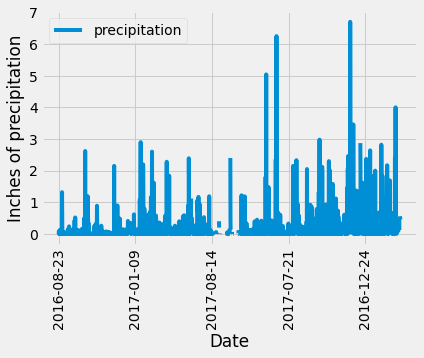

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date one year from the last date in data set.
previous = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= previous).all()
#for result in results:
    #print(result)
# Save the query results as a Pandas DataFrame and set the index to the date column
resultDF = pd.DataFrame(results, columns=['date', 'precipitation'])
resultDF. set_index('date', inplace = True)
#resultDF


# Use Pandas Plotting with Matplotlib to plot the data
resultDF.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches of precipitation")

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

resultDF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
numStations = session.query(func.count(Station.station)).all()
numStations

[(9)]

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activeStations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
mostActiveStation= activeStations[0][0]
mostActiveStation 

'USC00519281'

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == mostActiveStation).all()
lowest_temp


[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Choose the station with the highest number of temperature observations.
# List of the highest number of temperature observations
highest_temp_obs = session.query(Measurement.station, func.count(Measurement.tobs)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
highest_temp_obs



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
#Station with the highest number of temperature observation
station_highest_temp_obs = highest_temp_obs[0]
station_highest_temp_obs

('USC00519281', 2772)

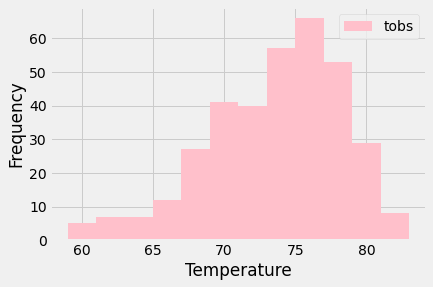

In [18]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date one year from the last date in data set.
previous = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the temperature observation data for this station
temp_obs_data = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= previous).all()
#temp_obs_data

# Save the query results as a Pandas DataFrame and set the index to the date column
temp_obs_data_df = pd.DataFrame(temp_obs_data, columns=['date', 'prpc', 'tobs'])
temp_obs_data_df. set_index('date', inplace = True)
#temp_obs_data_df

# Use Pandas Plotting with Matplotlib to plot the data
temp_obs_data_df.plot(kind='hist', bins=12, figsize=(6,4), color= 'pink')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()